# Metaheuristics libraries in Python

* [PySWARM](https://pyswarms.readthedocs.io/en/latest/)
* [scikit-opt](https://scikit-opt.github.io/scikit-opt/#/en/README)
* [networkx](https://networkx.org/)
* [Distributed Evolutionary Algorithms in Python - DEAP](https://deap.readthedocs.io/en/master/)
* [OR-Tools](https://developers.google.com/optimization)
* [Python Genetic Algorithms & Differential Evolution (PyGAD](https://pygad.readthedocs.io/en/latest/)
* [MEALPY](https://mealpy.readthedocs.io/en/latest/)
* [SimAnneal](https://github.com/perrygeo/simanneal)
* [NSGA-II: Non-dominated Sorting Genetic Algorithm in Pymoo](https://pymoo.org/algorithms/moo/nsga2.html)
* [swarmlib](https://pypi.org/project/swarmlib/)
* [HIVE](https://rwuilbercq.github.io/Hive/)
* [ACO-Pants](https://pypi.org/project/ACO-Pants/)

# Function Optimization

## pyswarms example

In [1]:
#!pip install pyswarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Mesher, Designer
import matplotlib.pyplot as plt
# Enables us to view it in a Jupyter notebook
from IPython.display import Image

# Set-up POS as an optimizer with 50 particles and predfined parameters
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)

#set-up the function to be optimized and the number of iteration
optimizer.optimize(fx.sphere, iters=100)

2023-01-21 14:36:17,932 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████|100/100, best_cost=1.67e-8
2023-01-21 14:36:18,182 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.671905129031219e-08, best pos: [ 1.82091896e-05 -1.28013580e-04]


(1.671905129031219e-08, array([ 1.82091896e-05, -1.28013580e-04]))

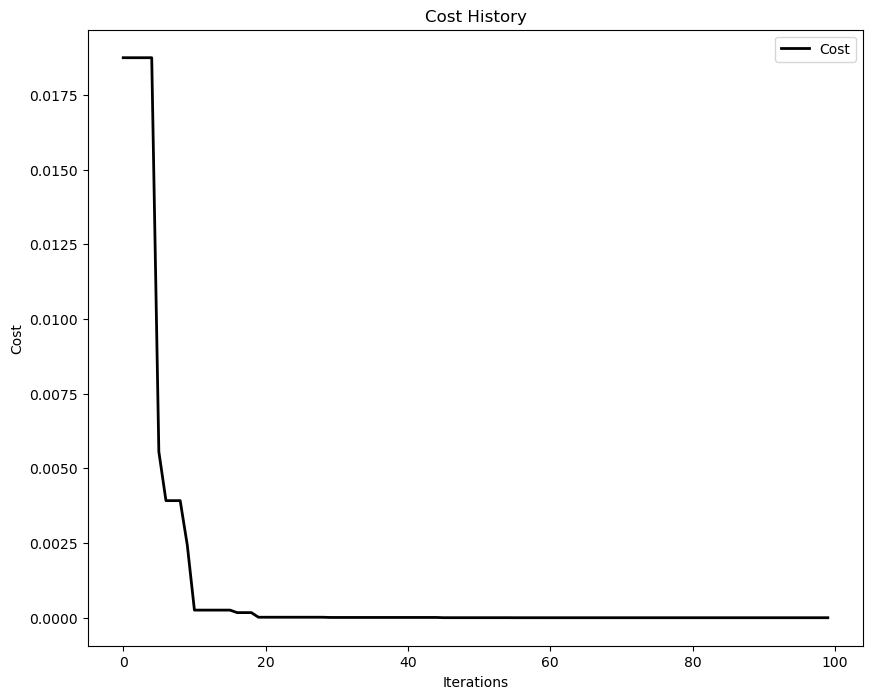

In [2]:
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

2023-01-21 14:36:23,868 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-01-21 14:36:23,870 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


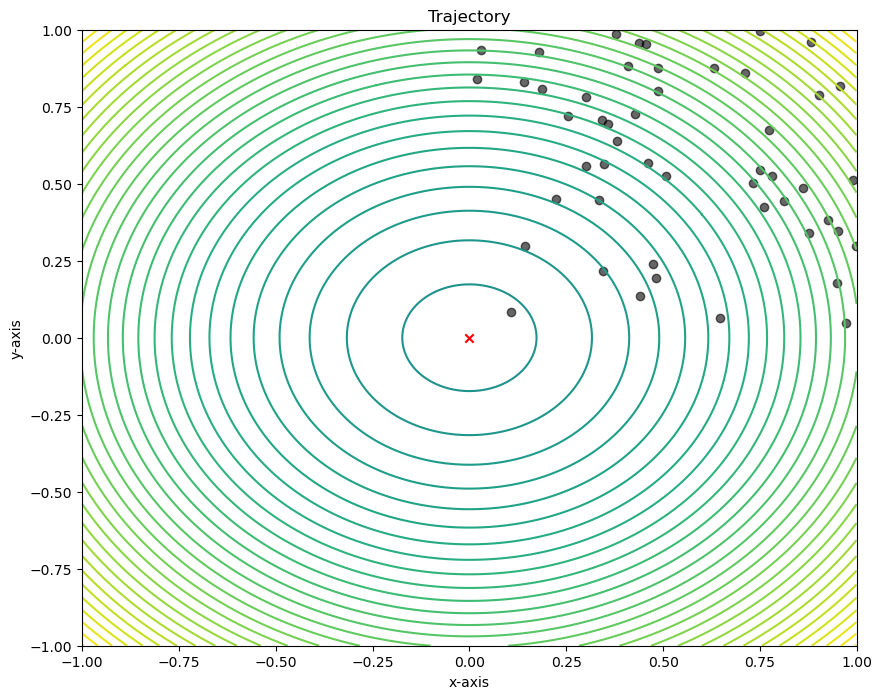

In [3]:
#conda install -c conda-forge ffmpeg

# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere, limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

animation = plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0))
animation.save('solution.gif', writer='imagemagick', fps=10)

In [4]:
# rendering the animation
Image(url='solution.gif')

## scikit-opt example

In [5]:
# !pip install scikit-opt

2023-01-21 14:36:59,055 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


best_x: [-67.54424189 -47.12388452] best_y -0.999999999986017


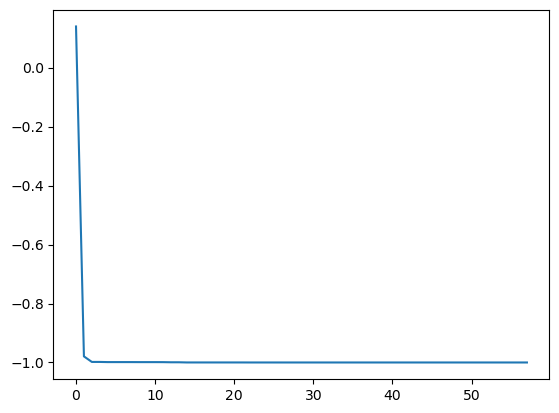

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sko.SA import SA

# define a multimodal function
obj_func = lambda x: np.sin(x[0]) * np.cos(x[1])

# solve using SA
sa = SA(func=obj_func, x0=np.array([-3, -3]), T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)

# print the result
plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

## pyswarm example

In [7]:
# !pip install --upgrade pyswarm

In [8]:
from pyswarms.single.global_best import GlobalBestPSO
import math

# Eggholder optimzation function
def eggholder_func(x):
    a=np.sqrt(np.fabs(x[:, 1]+x[:, 0]/2+47))
    b=np.sqrt(np.fabs(x[:, 0]-(x[:, 1]+47)))
    c=-(x[:, 1]+47)*np.sin(a)-x[:, 0]*np.sin(b)
    return c

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options)

In [9]:
cost, pos = optimizer.optimize(eggholder_func, 1000)
print(cost, pos)

2023-01-21 14:37:01,056 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████|1000/1000, best_cost=-66.8
2023-01-21 14:37:02,855 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -66.84371732946401, best pos: [ 8.45693456 15.6509182 ]


-66.84371732946401 [ 8.45693456 15.6509182 ]


# Travelling Salesman Problem (TSP)

In [10]:
# Define the TSP problem
city_names = ["1", "2", "3", "4", "5"]
distances = np.array([[0, 4, 2, 9, 12],
                      [4, 0, 7, 5, 5],
                      [2, 7, 0, 4, 10],
                      [9, 5, 4, 0, 3],
                      [12, 5, 10, 3, 0]])

## Solving TSP using scikit-opt

In [11]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP

num_points = len(city_names)
points_coordinate = city_names
distance_matrix = distances

# The objective function. input routine, return total distance.
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

# solving the problem using PSO
pso_tsp = PSO_TSP(func=cal_total_distance, n_dim=num_points, size_pop=200, max_iter=800, w=0.8, c1=0.1, c2=0.1)
best_points, best_distance = pso_tsp.run()
best_points_ = np.concatenate([best_points, [best_points[0]]])

print('best_distance', best_distance)
print('route', best_points_)

best_distance [18.]
route [1 0 2 3 4 1]


## Solving TSP using simulated annealing implemented in networkx

In [12]:
# !pip install networkx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import approximation as approx

# Create a graph
G=nx.Graph()

In [13]:
# add weighted edges to the graph and remove selfloop edges
for i in range(len(city_names)):
    for j in range(1,len(city_names)):
        G.add_weighted_edges_from({(city_names[i], city_names[j], distances[i][j])})
        G.remove_edges_from(nx.selfloop_edges(G))

In [14]:
# define pos is a dictionary of positions using using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(G)

In [15]:
# solve TSP using simulated annealing
cycle = approx.simulated_annealing_tsp(G, "greedy", source=city_names[0])
edge_list = list(nx.utils.pairwise(cycle))
cost = sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))

The route of the salesman is: ['1', '3', '4', '5', '2', '1'] with cost of  18


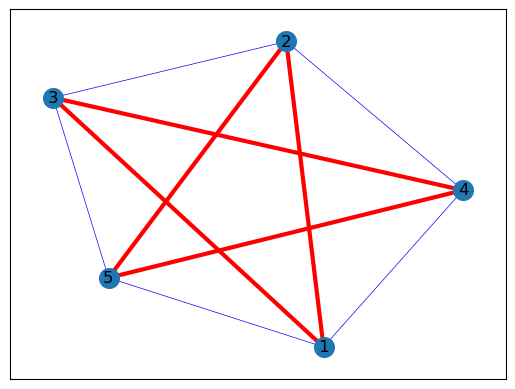

In [16]:
# Create an independent shallow copy of the graph and attributes
H = G.copy()

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    H,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the salesman is:", cycle, "with cost of ", cost)
plt.show()

## Solving TSP using deap

In [17]:
# !pip install deap

In [18]:
from deap import base, creator, tools, algorithms
import random
import numpy as np

# Create a fitness function that minimizes the total distance
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Create the genetic operator functions
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(len(city_names)), len(city_names))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_tsp(individual):
    total_distance = 0
    for i in range(len(individual)):
        city_1 = individual[i]
        city_2 = individual[(i + 1) % len(individual)]
        total_distance += distances[city_1][city_2]
    return total_distance,

toolbox.register("evaluate", eval_tsp)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, 
                               stats=stats, halloffame=hof, verbose=True)

# Print the final solution
best_individual = hof[0]
print("Best solution:")
print("  - Fitness: ", eval_tsp(best_individual))
print("  - Route: ", [city_names[i] for i in best_individual])

gen	nevals	avg 	min	max
0  	50    	30.8	18 	43 
1  	32    	27.32	18 	37 
2  	31    	23.52	18 	35 
3  	32    	22.24	18 	37 
4  	28    	19.28	18 	37 
5  	33    	19.7 	18 	37 
6  	26    	18.86	18 	35 
7  	28    	18.56	18 	30 
8  	32    	20   	18 	37 
9  	35    	19.22	18 	35 
10 	35    	19.5 	18 	37 
11 	33    	19.74	18 	35 
12 	34    	20.3 	18 	35 
13 	31    	19.6 	18 	31 
14 	26    	19.24	18 	32 
15 	32    	20.1 	18 	37 
16 	28    	19.22	18 	35 
17 	33    	18.66	18 	37 
18 	29    	18.62	18 	33 
19 	37    	18.72	18 	32 
20 	25    	18.96	18 	32 
21 	26    	18.48	18 	28 
22 	32    	19.2 	18 	32 
23 	32    	18.56	18 	32 
24 	27    	18.56	18 	30 
25 	22    	18.24	18 	30 
26 	32    	19.08	18 	32 
27 	28    	18.24	18 	30 
28 	33    	19.08	18 	32 
29 	32    	18.92	18 	32 
30 	28    	18.32	18 	26 
31 	35    	18.12	18 	24 
32 	30    	18.28	18 	32 
33 	38    	18   	18 	18 
34 	27    	18   	18 	18 
35 	29    	18.82	18 	37 
36 	29    	19.28	18 	32 
37 	31    	18   	18 	18 
38 	35    	18.16	18 	26 
39

## Solving TSP using OR-Tools

In [19]:
#!pip install --upgrade --user ortools

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

In [21]:
# define problem data
data = {}
data['distance_matrix'] = distances
data['num_vehicles'] = 1
data['depot'] = 0

# define the solver
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)   

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.TABU_SEARCH) # GREEDY_DESCENT, SIMULATED_ANNEALING, GENERIC_TABU_SEARCH
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

# print the solution
def print_solution(manager, routing, solution):
    print('Objective: {} meters'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}meters\n'.format(route_distance)

solution = routing.SolveWithParameters(search_parameters)
if solution:
    print_solution(manager, routing, solution)

Objective: 18 meters
Route for vehicle 0:
 0 -> 2 -> 3 -> 4 -> 1 -> 0

